In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import copy
#import random
#import scikit_posthocs as sp
import scipy.stats as stats
#from scipy.stats import normaltest
from scipy.stats import friedmanchisquare
#import pickle
import seaborn as sns
import Orange


In [3]:
from platform import python_version
import scipy
import seaborn
import Orange
import numpy
import pandas

print('Library versions:')
print('python', python_version())
print('scipy ',scipy. __version__ )
print('seaborn ',seaborn.__version__)
print('Orange ',Orange.__version__)
print('numpy ',numpy.__version__)
print('pandas ', pandas.__version__)


Library versions:
python 3.9.13
scipy  1.9.1
seaborn  0.11.2
Orange  3.34.1
numpy  1.24.3
pandas  1.4.4


In this notebook, we want to take the base classification performance results from the STs, the Meta-scaler and the Truth, and add the performances obtained with Jain et al. and Zagatti et al. approaches.

# Loading our results

In [4]:
# Loading results from the Meta-scaler experiments:
summary_predictions_DMI = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_DESMI.csv')

# Selecting the performances (F1) columns only:
perfs = summary_predictions_DMI[['Model', 'NS', 'SS', 'MMS', 'MAS', 'RS',
                                'QT', "Meta-scaler's Perf", "Oracles's Perf"]]
# Renaming columns:
perfs = perfs.rename(columns={"Meta-scaler's Perf":'Meta-scaler', "Oracles's Perf":'Oracle'})
perfs

,Model,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
0,Bagging,0.440079,0.466025,0.394689,0.303649,0.449671,0.451235,0.451235,0.466025
1,GLVQ,0.434862,0.462094,0.418003,0.445430,0.469747,0.487364,0.434862,0.487364
2,GP,0.362818,0.474876,0.384721,0.000000,0.484660,0.441929,0.441929,0.484660
3,KNORAE,0.435348,0.447054,0.492395,0.450039,0.432771,0.413654,0.435348,0.492395
4,KNORAU,0.443713,0.468347,0.487077,0.432025,0.478051,0.505159,0.443713,0.505159
...,...,...,...,...,...,...,...,...,...
3595,MLP,0.601871,0.431757,0.601871,0.601871,0.438325,0.415073,0.601871,0.601871
3596,OLA,0.414099,0.445926,0.386136,0.446185,0.376316,0.497744,0.445926,0.497744
3597,Percep,0.265806,0.434663,0.237405,0.267137,0.377495,0.421451,0.377495,0.434663
3598,SVM_RBF,0.186589,0.190331,0.201437,0.179149,0.217621,0.202262,0.186589,0.217621


In [5]:
mean_perf = perfs.groupby('Model').mean()
mean_perf

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
Model,,,,,,,,
Bagging,0.673594,0.714167,0.709450,0.704610,0.714275,0.711905,0.716966,0.731099
GLVQ,0.632876,0.622303,0.633579,0.652021,0.616737,0.602517,0.657624,0.664166
GP,0.740945,0.709744,0.730336,0.735978,0.672132,0.699824,0.752240,0.767073
KNORAE,0.724432,0.720988,0.721360,0.729274,0.737060,0.718474,0.743411,0.759312
KNORAU,0.706431,0.718591,0.712452,0.716867,0.732436,0.714506,0.738188,0.748576
LCA,0.619214,0.687280,0.652338,0.643596,0.690522,0.683929,0.678783,0.720666
MCB,0.718955,0.719740,0.717914,0.726693,0.732702,0.716226,0.743146,0.759971
MLP,0.667508,0.688575,0.651787,0.642455,0.668350,0.683295,0.700806,0.735850
OLA,0.718183,0.719958,0.720366,0.727349,0.734347,0.715079,0.743671,0.759698


In [6]:
med_df = pd.DataFrame(mean_perf.median()).T
med_df = med_df.rename(index={0:'Median'})
means_df = pd.DataFrame(mean_perf.mean()).T
means_df = means_df.rename(index={0:'Mean'})
stddev_df = pd.DataFrame(mean_perf.std()).T
stddev_df = stddev_df.rename(index={0:'Stddev'})
mean_rank_df = pd.DataFrame(mean_perf.iloc[:,:-1].rank(axis='columns', numeric_only=True, ascending=False).mean()).T
mean_rank_df = mean_rank_df.rename(index={0:'Mean rank'}).round(decimals=4)
mean_rank_df['Oracle'] = 'N/A'
#mean_perf = pd.concat([mean_perf, med_df, means_df, stddev_df, mean_rank_df, pvalues_df])
mean_perf = pd.concat([mean_perf.round(decimals=4), 
                       med_df.round(decimals=4), 
                       means_df.round(decimals=4), 
                       stddev_df.round(decimals=4), 
                       mean_rank_df])

mean_perf

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
Bagging,0.6736,0.7142,0.7094,0.7046,0.7143,0.7119,0.7170,0.7311
GLVQ,0.6329,0.6223,0.6336,0.6520,0.6167,0.6025,0.6576,0.6642
GP,0.7409,0.7097,0.7303,0.7360,0.6721,0.6998,0.7522,0.7671
KNORAE,0.7244,0.7210,0.7214,0.7293,0.7371,0.7185,0.7434,0.7593
KNORAU,0.7064,0.7186,0.7125,0.7169,0.7324,0.7145,0.7382,0.7486
LCA,0.6192,0.6873,0.6523,0.6436,0.6905,0.6839,0.6788,0.7207
MCB,0.7190,0.7197,0.7179,0.7267,0.7327,0.7162,0.7431,0.76
MLP,0.6675,0.6886,0.6518,0.6425,0.6683,0.6833,0.7008,0.7358
OLA,0.7182,0.7200,0.7204,0.7273,0.7343,0.7151,0.7437,0.7597
Percep,0.5932,0.6889,0.6510,0.6420,0.6876,0.6864,0.6702,0.7249


# Loading their results:

In [7]:
jain_perfs = pd.read_csv('../code/Reproducing_Jain_et_al/jain_et_al_classification_performances.csv').iloc[:,1:]
jain_perfs

,Bagging,GLVQ,GP,KNORAE,KNORAU,LCA,MCB,MLP,OLA,Percep,SVM_RBF,SVM_lin
0,0.394689,0.418003,0.384721,0.492395,0.487077,0.220839,0.492665,0.662205,0.535772,0.383329,0.453572,0.457443
1,0.627831,0.619160,0.625233,0.586660,0.642697,0.455531,0.596047,0.000000,0.591616,0.557115,0.587516,0.609299
2,0.366334,0.512624,0.485306,0.444194,0.450647,0.399639,0.470822,0.673568,0.451370,0.434061,0.451279,0.412555
3,0.464659,0.513954,0.275781,0.424394,0.458579,0.420745,0.443409,0.665201,0.442450,0.558772,0.448221,0.492700
4,0.459579,0.624894,0.611336,0.460374,0.523039,0.408728,0.505028,0.692785,0.508054,0.305671,0.535946,0.514049
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.544634,0.542386,0.375519,0.428957,0.538095,0.504026,0.538888,0.000000,0.563854,0.527724,0.534791,0.533769
296,0.686574,0.654669,0.676788,0.598052,0.681330,0.556507,0.635977,0.113043,0.616204,0.595677,0.684449,0.655115
297,0.612490,0.666195,0.635883,0.456978,0.613727,0.591554,0.527027,0.659512,0.551723,0.459202,0.605506,0.604518
298,0.448158,0.149134,0.110849,0.424710,0.385779,0.504779,0.394609,0.666667,0.392255,0.272819,0.622763,0.374748


In [8]:
zagatti_perfs = pd.read_csv('../code/Reproducing_Zagatti_et_al/zagatti_et_al_classification_performances.csv').iloc[:,1:]
zagatti_perfs

,Bagging,GLVQ,GP,KNORAE,KNORAU,LCA,MCB,MLP,OLA,Percep,SVM_RBF,SVM_lin
0,0.464001,0.443177,0.347027,0.478523,0.499994,0.398535,0.463956,0.662205,0.477515,0.278349,0.439474,0.000000
1,0.233978,0.394947,0.328986,0.376193,0.361746,0.632781,0.527756,0.000000,0.517185,0.366907,0.373228,0.070000
2,0.432564,0.563616,0.553101,0.385949,0.475531,0.276677,0.445090,0.673568,0.459164,0.452810,0.478280,0.673568
3,0.512431,0.521737,0.308831,0.480993,0.470164,0.553498,0.476954,0.665201,0.477142,0.463270,0.116129,0.116129
4,0.483463,0.692785,0.498261,0.482514,0.485289,0.266601,0.480261,0.692785,0.466810,0.319064,0.514421,0.692785
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.203876,0.341270,0.455324,0.451656,0.469105,0.349556,0.550250,0.000000,0.545927,0.243336,0.451668,0.190756
296,0.546764,0.487720,0.561208,0.608054,0.596280,0.323587,0.651266,0.000000,0.634354,0.391831,0.526458,0.428936
297,0.636444,0.696947,0.642126,0.495593,0.604631,0.318401,0.553221,0.696947,0.540523,0.622631,0.696947,0.696947
298,0.525222,0.229665,0.257564,0.503516,0.608121,0.404930,0.572974,0.666667,0.587227,0.619377,0.422739,0.365132


In [9]:
jain_perfs.mean().T

Bagging    0.712870
GLVQ       0.624984
GP         0.705526
KNORAE     0.722417
KNORAU     0.718334
LCA        0.676628
MCB        0.718868
MLP        0.687647
OLA        0.718981
Percep     0.678886
SVM_RBF    0.726086
SVM_lin    0.702260
dtype: float64

In [10]:
jain_mean_perfs = pd.DataFrame(jain_perfs.mean().T, columns=['Jain et al.'])

In [11]:
zagatti_perfs.mean().T

Bagging    0.663847
GLVQ       0.595422
GP         0.712031
KNORAE     0.713330
KNORAU     0.694819
LCA        0.609491
MCB        0.712873
MLP        0.579015
OLA        0.713061
Percep     0.598592
SVM_RBF    0.654089
SVM_lin    0.558481
dtype: float64

In [12]:
zagatti_mean_perfs = pd.DataFrame(zagatti_perfs.mean().T, columns=['Zagatti et al.'])

# Merging ours and theirs mean performances

In [13]:
all_mean_perfs = pd.concat([perfs.groupby('Model').mean(), jain_mean_perfs, zagatti_mean_perfs], axis=1)
# Reordering columns so that the Oracle (Truth) is the last one:
all_mean_perfs = all_mean_perfs[['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler',
       'Jain et al.', 'Zagatti et al.', 'Oracle']]
all_mean_perfs

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Jain et al.,Zagatti et al.,Oracle
Bagging,0.673594,0.714167,0.709450,0.704610,0.714275,0.711905,0.716966,0.712870,0.663847,0.731099
GLVQ,0.632876,0.622303,0.633579,0.652021,0.616737,0.602517,0.657624,0.624984,0.595422,0.664166
GP,0.740945,0.709744,0.730336,0.735978,0.672132,0.699824,0.752240,0.705526,0.712031,0.767073
KNORAE,0.724432,0.720988,0.721360,0.729274,0.737060,0.718474,0.743411,0.722417,0.713330,0.759312
KNORAU,0.706431,0.718591,0.712452,0.716867,0.732436,0.714506,0.738188,0.718334,0.694819,0.748576
LCA,0.619214,0.687280,0.652338,0.643596,0.690522,0.683929,0.678783,0.676628,0.609491,0.720666
MCB,0.718955,0.719740,0.717914,0.726693,0.732702,0.716226,0.743146,0.718868,0.712873,0.759971
MLP,0.667508,0.688575,0.651787,0.642455,0.668350,0.683295,0.700806,0.687647,0.579015,0.735850
OLA,0.718183,0.719958,0.720366,0.727349,0.734347,0.715079,0.743671,0.718981,0.713061,0.759698
Percep,0.593156,0.688948,0.651037,0.642036,0.687643,0.686416,0.670212,0.678886,0.598592,0.724907


In [14]:
med_df = pd.DataFrame(all_mean_perfs.median()).T
med_df = med_df.rename(index={0:'Median'})
means_df = pd.DataFrame(all_mean_perfs.mean()).T
means_df = means_df.rename(index={0:'Mean'})
stddev_df = pd.DataFrame(all_mean_perfs.std()).T
stddev_df = stddev_df.rename(index={0:'Stddev'})
mean_rank_df = pd.DataFrame(all_mean_perfs.iloc[:,:-1].rank(axis='columns', numeric_only=True, ascending=False).mean()).T
mean_rank_df = mean_rank_df.rename(index={0:'Mean rank'}).round(decimals=4)
mean_rank_df['Oracle'] = 'N/A'
all_mean_perfs_rnk = pd.concat([all_mean_perfs.round(decimals=4), 
                       med_df.round(decimals=4), 
                       means_df.round(decimals=4), 
                       stddev_df.round(decimals=4), 
                       mean_rank_df])

all_mean_perfs_rnk

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Jain et al.,Zagatti et al.,Oracle
Bagging,0.6736,0.7142,0.7094,0.7046,0.7143,0.7119,0.7170,0.7129,0.6638,0.7311
GLVQ,0.6329,0.6223,0.6336,0.6520,0.6167,0.6025,0.6576,0.6250,0.5954,0.6642
GP,0.7409,0.7097,0.7303,0.7360,0.6721,0.6998,0.7522,0.7055,0.7120,0.7671
KNORAE,0.7244,0.7210,0.7214,0.7293,0.7371,0.7185,0.7434,0.7224,0.7133,0.7593
KNORAU,0.7064,0.7186,0.7125,0.7169,0.7324,0.7145,0.7382,0.7183,0.6948,0.7486
LCA,0.6192,0.6873,0.6523,0.6436,0.6905,0.6839,0.6788,0.6766,0.6095,0.7207
MCB,0.7190,0.7197,0.7179,0.7267,0.7327,0.7162,0.7431,0.7189,0.7129,0.76
MLP,0.6675,0.6886,0.6518,0.6425,0.6683,0.6833,0.7008,0.6876,0.5790,0.7358
OLA,0.7182,0.7200,0.7204,0.7273,0.7343,0.7151,0.7437,0.7190,0.7131,0.7597
Percep,0.5932,0.6889,0.6510,0.6420,0.6876,0.6864,0.6702,0.6789,0.5986,0.7249


In [15]:
all_mean_perfs_rnk = all_mean_perfs_rnk.rename(columns={'Oracle':'Truth'})
#all_mean_perfs_rnk.to_csv('../results/csv_tabs/SOTA_comparison_with_STs.csv')

In [16]:
noSTs_mean_perfs = all_mean_perfs.copy().iloc[:,-4:]
med_df = pd.DataFrame(noSTs_mean_perfs.median()).T
med_df = med_df.rename(index={0:'Median'})
means_df = pd.DataFrame(noSTs_mean_perfs.mean()).T
means_df = means_df.rename(index={0:'Mean'})
stddev_df = pd.DataFrame(noSTs_mean_perfs.std()).T
stddev_df = stddev_df.rename(index={0:'Stddev'})
mean_rank_df = pd.DataFrame(noSTs_mean_perfs.iloc[:,:-1].rank(axis='columns', numeric_only=True, ascending=False).mean()).T
mean_rank_df = mean_rank_df.rename(index={0:'Mean rank'}).round(decimals=4)
#mean_rank_df['Oracle'] = 'N/A'
noSTs_mean_perfs_rnk = pd.concat([noSTs_mean_perfs.round(decimals=4), 
                       med_df.round(decimals=4), 
                       means_df.round(decimals=4), 
                       stddev_df.round(decimals=4), 
                       mean_rank_df])

noSTs_mean_perfs_rnk

,Meta-scaler,Jain et al.,Zagatti et al.,Oracle
Bagging,0.7170,0.7129,0.6638,0.7311
GLVQ,0.6576,0.6250,0.5954,0.6642
GP,0.7522,0.7055,0.7120,0.7671
KNORAE,0.7434,0.7224,0.7133,0.7593
KNORAU,0.7382,0.7183,0.6948,0.7486
LCA,0.6788,0.6766,0.6095,0.7207
MCB,0.7431,0.7189,0.7129,0.7600
MLP,0.7008,0.6876,0.5790,0.7358
OLA,0.7437,0.7190,0.7131,0.7597
Percep,0.6702,0.6789,0.5986,0.7249


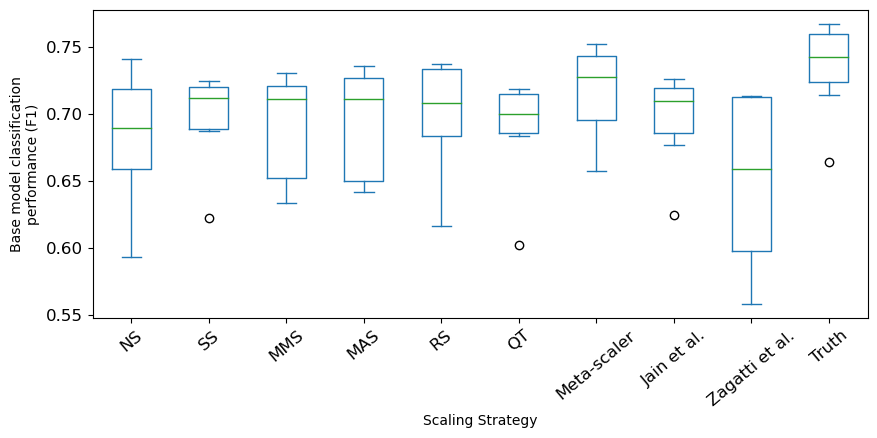

In [42]:
all_mean_perfs = all_mean_perfs.rename(columns={'Oracle':'Truth'})
all_mean_perfs.plot(kind='box', title='',figsize=(10,4), fontsize=12, rot=40)
plt.ylabel('Base model classification\nperformance (F1)')
plt.xlabel('Scaling Strategy')
plt.show()

In [59]:
all_mean_perfs.iloc[:,-4:].plot(kind='box', title='',figsize=(6,2.5), fontsize=12)
plt.ylabel('Base model classification\nperformance (F1)')
plt.xlabel('ST selection method')
#plt.savefig('../figs/box_plot_SOTA_comparison.pdf', bbox_inches = 'tight')

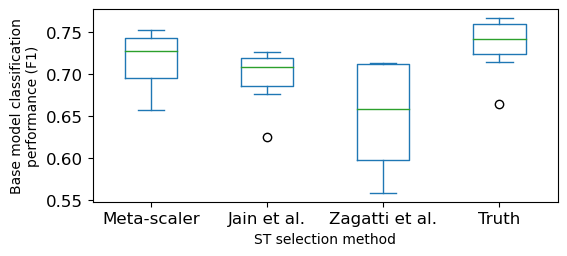

In [60]:
plt.show()

In [1]:
# noSTs_mean_perfs = all_mean_perfs.copy().iloc[:,-4:]
# reduced_mean_perfs = noSTs_mean_perfs.drop(columns=['Zagatti et al.'])
# med_df = pd.DataFrame(reduced_mean_perfs.median()).T
# med_df = med_df.rename(index={0:'Median'})
# means_df = pd.DataFrame(reduced_mean_perfs.mean()).T
# means_df = means_df.rename(index={0:'Mean'})
# stddev_df = pd.DataFrame(reduced_mean_perfs.std()).T
# stddev_df = stddev_df.rename(index={0:'Stddev'})
# mean_rank_df = pd.DataFrame(reduced_mean_perfs.iloc[:,:-1].rank(axis='columns', numeric_only=True, ascending=False).mean()).T
# mean_rank_df = mean_rank_df.rename(index={0:'Mean rank'}).round(decimals=4)
# #mean_rank_df['Oracle'] = 'N/A'
# reduced_mean_perfs_rnk = pd.concat([reduced_mean_perfs.round(decimals=4), 
#                        med_df.round(decimals=4), 
#                        means_df.round(decimals=4), 
#                        stddev_df.round(decimals=4), 
#                        mean_rank_df])

# reduced_mean_perfs_rnk

In [65]:
# reduced_mean_perfs_rnk.to_csv('../results/csv_tabs/SOTA_comparison_reduced.csv', float_format='%.4f')

In [17]:
noSTs_mean_perfs

,Meta-scaler,Jain et al.,Zagatti et al.,Oracle
Bagging,0.716966,0.712870,0.663847,0.731099
GLVQ,0.657624,0.624984,0.595422,0.664166
GP,0.752240,0.705526,0.712031,0.767073
KNORAE,0.743411,0.722417,0.713330,0.759312
KNORAU,0.738188,0.718334,0.694819,0.748576
LCA,0.678783,0.676628,0.609491,0.720666
MCB,0.743146,0.718868,0.712873,0.759971
MLP,0.700806,0.687647,0.579015,0.735850
OLA,0.743671,0.718981,0.713061,0.759698
Percep,0.670212,0.678886,0.598592,0.724907


#### Hypothesis test (included in paper)

Now, let's do a Wilcoxon paired test comparing each competing method to the Meta-scaler.
First we need to perform a normality test and then a hypothesis test to verify if the differences in results for each method over the different base models are in fact statistically significant.

In [18]:
noSTs_mean_perfs.columns

Index(['Meta-scaler', 'Jain et al.', 'Zagatti et al.', 'Oracle'], dtype='object')

In [19]:
names = ['Meta-scaler', 'Jain et al.', 'Zagatti et al.']

#Normality tests:
print('*** Shapiro-Wilk normality test for each of the 3 samples: ***')
for name in names:
    print(name)
    stat, p = stats.shapiro(noSTs_mean_perfs[name].values)
    if p > 0.05: print(f'Probably Gaussian (p={p}).') # null hypothesis: x comes from a normal distribution
    else: print(f'Probably not Gaussian (p={p}).')

        

*** Shapiro-Wilk normality test for each of the 3 samples: ***
Meta-scaler
Probably Gaussian (p=0.07743757963180542).
Jain et al.
Probably not Gaussian (p=0.014170254580676556).
Zagatti et al.
Probably Gaussian (p=0.05941353365778923).


Since normality tests indicated that at least one of the samples may not follow a normal distribution, let's apply a non parametric test. We will use the Wilcoxon signed-rank test comparing each method to the Meta-scaler, since we are doing multiple paired comparisons we will correct alpha via Bonferroni correction:

Perform the Wilcoxon signed-rank test comparing each ST to the Meta-scaler:

In [20]:
names = ['Meta-scaler', 'Jain et al.', 'Zagatti et al.']
#Correcting alpha via Bonferroni correction:
n_samples = len(names)
alpha = 0.05
c_alpha = alpha/(n_samples*(n_samples-1))
print(f'Corrected alpha = {c_alpha}')

#Wilcoxon signed rank test
pvalues = {}
for i in range(0,3):
    if i != 0:
        print(f'\n\nComparing Meta-scaler with {names[i]}:')
        diff = (noSTs_mean_perfs['Meta-scaler'].values -  noSTs_mean_perfs[names[i]].values)
        res = stats.wilcoxon(diff)
        print('H_0: no difference')
        print(res)
        if res.pvalue < c_alpha:
            print(f'Meta-scaler significantly different than {names[i]}')
        else:
            print(f'Meta-scaler NOT significantly different than {names[i]}')
        pvalues[names[i]] = res.pvalue
    else:
        pvalues[names[i]] = np.nan


Corrected alpha = 0.008333333333333333


Comparing Meta-scaler with Jain et al.:
H_0: no difference
WilcoxonResult(statistic=4.0, pvalue=0.00341796875)
Meta-scaler significantly different than Jain et al.


Comparing Meta-scaler with Zagatti et al.:
H_0: no difference
WilcoxonResult(statistic=0.0, pvalue=0.00048828125)
Meta-scaler significantly different than Zagatti et al.


In [33]:
pvalues

{'Meta-scaler': nan,
 'Jain et al.': 0.00341796875,
 'Zagatti et al.': 0.00048828125}

In [42]:
pvalues_df = pd.DataFrame(pvalues, index=[0])[['Meta-scaler', 'Jain et al.', 'Zagatti et al.']].T
#pvalues_df.to_csv('../results/csv_tabs/p_values_wilcoxon_clf_perfs.csv', encoding='utf8', float_format='%.4e', index=True)

In [43]:
pvalues_df = pvalues_df.T.rename(index={0:'p-values'})
pvalues_df['Meta-scaler'] = 'N/A'
pvalues_df['Truth'] = 'N/A'
pvalues_df = pvalues_df.loc[:,['Meta-scaler', 'Jain et al.', 'Zagatti et al.', 'Truth']]
# Transforming values to string and formatting them:
for col in ['Jain et al.', 'Zagatti et al.']:
    pvalues_df[col] = f'{pvalues_df[col].values[0]:.1e}'

In [44]:
pvalues_df

,Meta-scaler,Jain et al.,Zagatti et al.,Truth
p-values,N/A,3.4e-03,4.9e-04,N/A


In [49]:
# Final SOTA comparison table:
SOTA_comp = pd.concat([noSTs_mean_perfs_rnk.rename(columns={'Oracle':'Truth'}), pvalues_df])
SOTA_comp

,Meta-scaler,Jain et al.,Zagatti et al.,Truth
Bagging,0.717,0.7129,0.6638,0.7311
GLVQ,0.6576,0.625,0.5954,0.6642
GP,0.7522,0.7055,0.712,0.7671
KNORAE,0.7434,0.7224,0.7133,0.7593
KNORAU,0.7382,0.7183,0.6948,0.7486
LCA,0.6788,0.6766,0.6095,0.7207
MCB,0.7431,0.7189,0.7129,0.76
MLP,0.7008,0.6876,0.579,0.7358
OLA,0.7437,0.719,0.7131,0.7597
Percep,0.6702,0.6789,0.5986,0.7249


In [50]:
SOTA_comp.to_csv('../results/csv_tabs/SOTA_comparison.csv', float_format='%.4f')